In [1]:
import gzip
from collections import Counter, defaultdict
import multiprocessing as mp
from Bio import SeqIO
import pysam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Profiling of base quality

Analyzed phred quality score distribution in reads.

In [4]:
runs = ["20220708_GM12878", "20220708_GM12878R2", "20220817_HG001", "20220915_P1", "20220916_P1", "20220916_P2"]
array = []

for run in runs:
    fq = "../../1_NanoStrandSeq/data/datasets/%s.fastq.gz" % run
    qs = []
    with gzip.open(fq, "rt") as f:
        for i, read in enumerate(SeqIO.parse(f, "fastq")):
            if i >= 10000:
                break
            qs.extend(read.letter_annotations["phred_quality"])
    counter = Counter(qs)
    xs = np.arange(0, 50)
    ys = np.array([counter[x] for x in xs])
    ys = ys * 100 / sum(counter.values())
    mean = np.mean(qs)
    median = np.median(qs)
    array.append([xs, ys, mean, median])

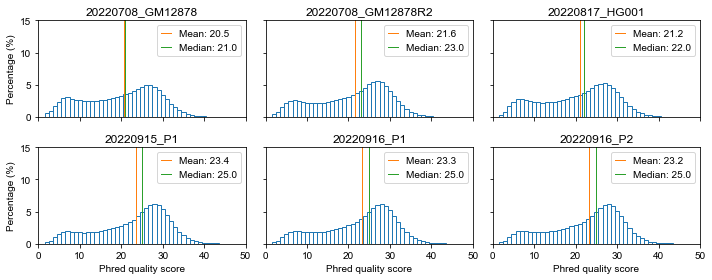

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(10, 4), sharex=True, sharey=True)

for i in range(len(runs)):
    run = runs[i]
    xs, ys, mean, median = array[i]
      
    row = int(i / 3)
    col = i % 3
    ax = axs[row][col]
        
    plt.sca(ax)
    plt.title(run)
    plt.bar(xs, ys, width=1, color="none", edgecolor="C0")
    plt.axvline(mean, label="Mean: %.1f" % mean, color="C1", lw=1)
    plt.axvline(median, label="Median: %.1f" % median, color="C2", lw=1)
    plt.xlim(0, 50)
    plt.ylim(0, 15)
    if row == 1:
        plt.xlabel("Phred quality score")
    if col == 0:
        plt.ylabel("Percentage (%)")
    plt.legend(handlelength=1)
    
plt.tight_layout()
plt.savefig("figures/distribution_of_phred_quality_score.pdf", dpi=300)

# Base quality at head and tail region

In [6]:
runs = ["20220708_GM12878", "20220708_GM12878R2", "20220817_HG001", "20220915_P1", "20220916_P1", "20220916_P2"]
array = []
w = 400

for run in runs:
    print(run)
    fq = "../../1_NanoStrandSeq/data/datasets/%s.fastq.gz" % run
    
    heads = []
    tails = []
    
    with gzip.open(fq, "rt") as f:
        for i, read in enumerate(SeqIO.parse(f, "fastq")):
            if i >= 10000:
                break
            if len(read) >= w * 2:
                qs = read.letter_annotations["phred_quality"]
                heads.append(qs[:w])
                tails.append(qs[-w:][::-1])
    m1 = pd.DataFrame(heads)
    m2 = pd.DataFrame(tails)
    array.append([m1, m2])


20220708_GM12878
20220708_GM12878R2
20220817_HG001
20220915_P1
20220916_P1
20220916_P2


20220708_GM12878
20220708_GM12878R2
20220817_HG001
20220915_P1
20220916_P1
20220916_P2


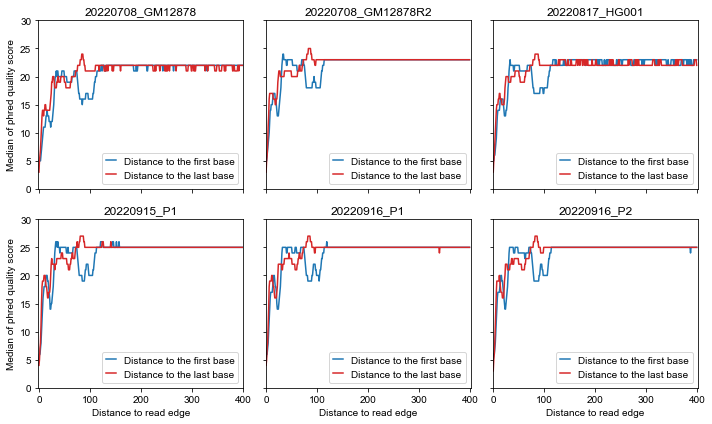

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)

for i in range(len(runs)):
    run = runs[i]
    m1, m2 = array[i]
    print(run)
    
    row = int(i / 3)
    col = i % 3
    ax = axs[row][col]
    plt.sca(ax)
    plt.title(run)
        
    xs1 = np.arange(w)
    ys1 = m1.median() 

    xs2 = np.arange(w)
    ys2 = m2.median() 

    plt.plot(xs1, ys1, color="C0", label="Distance to the first base")
    plt.plot(xs2, ys2, color="C3", label="Distance to the last base")
    if row == 1:
        plt.xlabel("Distance to read edge")
    if col == 0:
        plt.ylabel("Median of phred quality score")
    plt.xlim(0 - 1, w + 1)
    plt.ylim(0, 30)
    plt.legend(loc="lower right", bbox_to_anchor=(1, 0), handlelength=1)
    plt.tight_layout()
plt.savefig("figures/read_edge_base_quality.pdf", dpi=300)

In [8]:
print("Score\tAccuracy")
print("-" * 60)
for score in range(10, 30):
    accuracy = 1 - 10 ** (- score / 10)
    print(score, accuracy, sep="\t")

Score	Accuracy
------------------------------------------------------------
10	0.9
11	0.9205671765275718
12	0.9369042655519807
13	0.9498812766372727
14	0.9601892829446502
15	0.9683772233983162
16	0.9748811356849042
17	0.9800473768503112
18	0.9841510680753889
19	0.9874107458820583
20	0.99
21	0.9920567176527572
22	0.993690426555198
23	0.9949881276637272
24	0.996018928294465
25	0.9968377223398316
26	0.9974881135684904
27	0.9980047376850312
28	0.9984151068075389
29	0.9987410745882058
